In [21]:
# Data exploration
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from NYC_GetCleaned_HistoricData import getCleanedDataFrame
from NYC_GetCleaned_TotalPopulation import getMeanPopulation
import data_utility

In [2]:
#Get the Current working directory
crimes_original = getCleanedDataFrame()

In [3]:
crimes_original.shape

(5835784, 16)

In [35]:
"""Create a datetime index of times that crimes were reported to have been committed"""

dfCopy = crimes_original.copy()
def eliminate_dates(x):
    if x[2] > '2050':
        x = None
    elif x[2] < '2010':
        x = None
    else:
        aa= '/'.join(x)
        return (aa)

#get dummy columns for crime categories
dfCopy = dfCopy.join(dfCopy['LAW_CAT_CD'].str.get_dummies())

#Create index with DateTime
dfCopy['CMPLNT_FR_DT'] = dfCopy['CMPLNT_FR_DT'].str.split("/")
dfCopy['CMPLNT_FR_DT'] = dfCopy['CMPLNT_FR_DT'].apply(lambda x: eliminate_dates(x))

#Combing date and time columns
dfCopy['StartTime'] = dfCopy['CMPLNT_FR_DT'] +' '+dfCopy['CMPLNT_FR_TM']
dfCopy['StartTime'] = pd.to_datetime(dfCopy['StartTime'])

#set full date as index
dfCopy.set_index('StartTime', inplace=True)          

dfCopy.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Latitude,Longitude,Lat_Lon,FELONY,MISDEMEANOR,VIOLATION
StartTime,,,,,,,,,,,,,,,,,,,
2014-03-30 20:40:00,3/30/2014,20:40:00,3/30/2014,20:50:00,3/30/2014,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE,INTENT TO",ATTEMPTED,FELONY,BRONX,44.0,INSIDE,RESIDENCE - APT. HOUSE,40.836162,-73.915250,"(40.836161968, -73.915249813)",1,0,0
2014-04-16 22:10:00,4/16/2014,22:10:00,4/16/2014,22:12:00,4/17/2014,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE,POSSESS.",ATTEMPTED,FELONY,BRONX,47.0,INSIDE,STREET,40.894671,-73.861361,"(40.894670712, -73.86136123)",1,0,0
2014-04-08 13:45:00,4/8/2014,13:45:00,4/8/2014,13:50:00,4/8/2014,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE, SALE 5",ATTEMPTED,FELONY,BRONX,52.0,INSIDE,STREET,40.864191,-73.901183,"(40.864190693, -73.901182887)",1,0,0
2014-05-17 21:17:00,5/17/2014,21:17:00,5/17/2014,21:24:00,5/17/2014,FELONY ASSAULT,"ASSAULT 2,1,PEACE OFFICER",ATTEMPTED,FELONY,BRONX,40.0,INSIDE,STREET,40.813052,-73.908159,"(40.813051503, -73.908158845)",1,0,0
2014-04-26 00:00:00,4/26/2014,00:00:00,4/26/2014,00:01:00,4/26/2014,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,FELONY,BRONX,41.0,INSIDE,STREET,40.814602,-73.885895,"(40.814601602, -73.885895461)",1,0,0


In [5]:
dfCopy.shape

(5835784, 19)

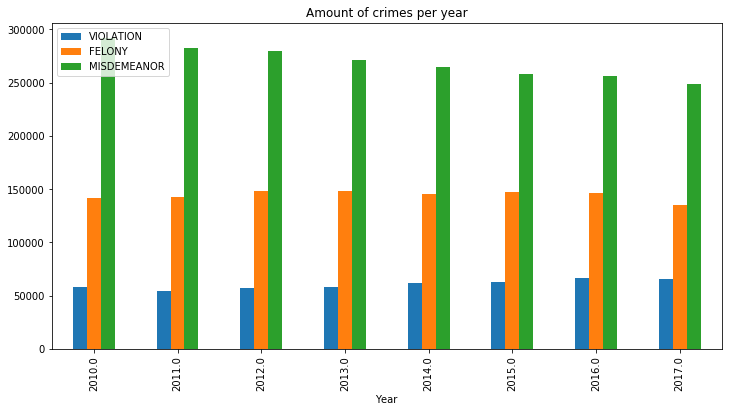

In [6]:
"""Analysis of Violations, Felonies and Misdemeanor"""

dfYear = dfCopy.copy()
dfYear.index = dfYear.index.year
vis0 = dfYear.groupby([dfYear.index.get_level_values(0)])[['VIOLATION','FELONY','MISDEMEANOR']].sum()

vis0.plot.bar(figsize=(12,6))
plt.title('Amount of crimes per year')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.show()

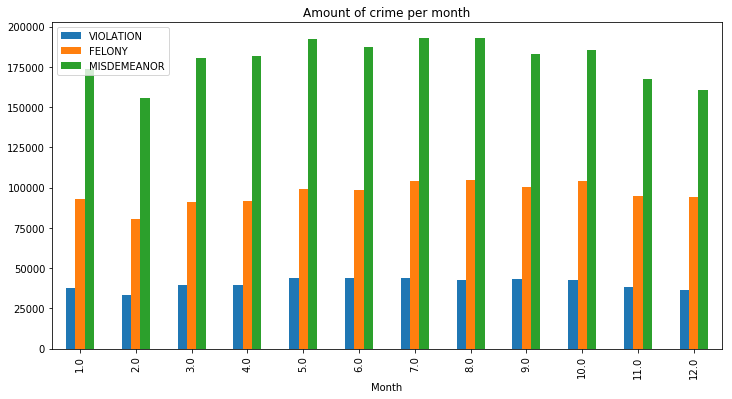

In [7]:
dfMonth = dfCopy.copy()
dfMonth.index = dfMonth.index.month
vis1 = dfMonth.groupby([dfMonth.index.get_level_values(0)])[['VIOLATION','FELONY','MISDEMEANOR']].sum()

vis1.plot.bar(figsize=(12,6))
plt.title('Amount of crime per month')
plt.legend(loc='upper left')
plt.xlabel('Month')
plt.show()

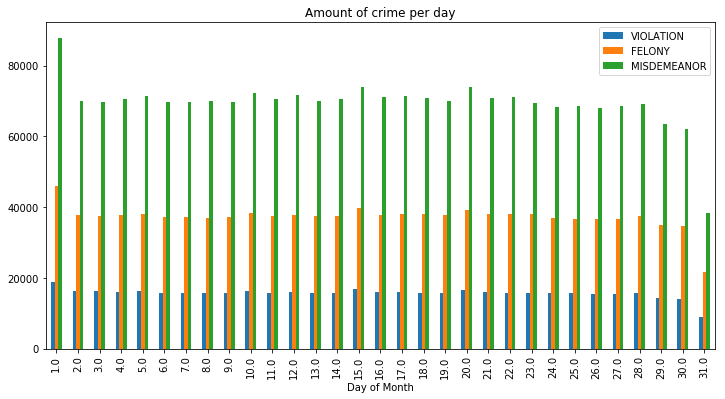

In [8]:
dfDay = dfCopy.copy() 
dfDay.index = dfDay.index.day
vis2 = dfDay.groupby([dfDay.index.get_level_values(0)])[['VIOLATION','FELONY','MISDEMEANOR']].sum()

vis2.plot.bar(figsize=(12,6))
plt.title('Amount of crime per day')
plt.xlabel('Day of Month')
plt.show()


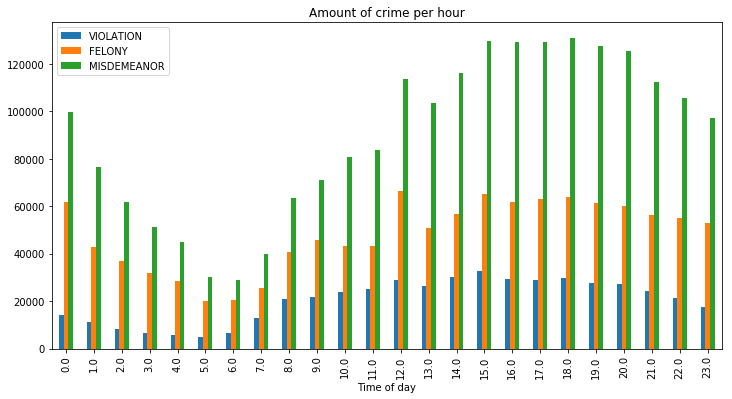

In [9]:
dfHour = dfCopy.copy() 
dfHour.index = dfHour.index.hour  

vis3 = dfHour.groupby([dfHour.index.get_level_values(0)])[['VIOLATION','FELONY','MISDEMEANOR']].sum()
vis3.plot.bar(figsize=(12,6))
plt.title('Amount of crime per hour')
plt.xlabel('Time of day')
plt.show()

In [10]:
#Get the total mean population of NYC based on borough
""" Bronx - 1, Brooklyn - 2, Manhattan - 3, Queens - 4, Staten Island - 5 """

bronxPop = getMeanPopulation('Bronx', 1)
brookylnPop = getMeanPopulation('Brooklyn', 2)
manhattanPop = getMeanPopulation('Manhattan', 3)
queensPop = getMeanPopulation('Queens', 4)
statIslandPop = getMeanPopulation('Staten Island', 5)

In [18]:
print(bronxPop)
print(brookylnPop)
print(manhattanPop)
print(queensPop)
print(statIslandPop)

1415948.0
2600681.5
1612077.0
2290148.5
477942.5


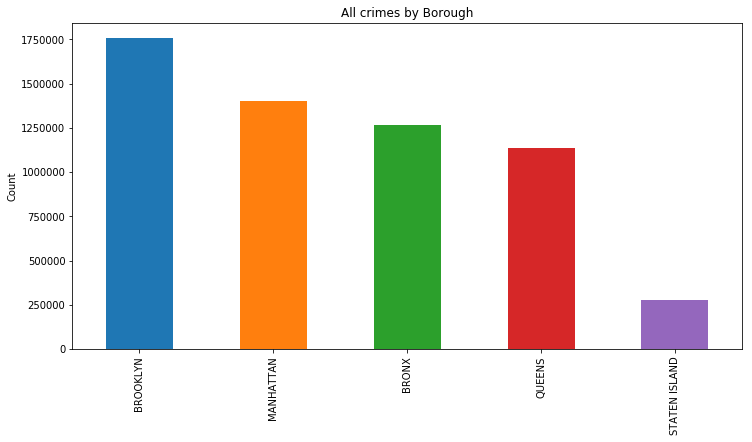

In [24]:
"""All NYC crimes reported by boro """

crimesByBoro = dfCopy.copy()
crimesByBoro.index = crimesByBoro.index.year
crimesByBoro['BORO_NM'].value_counts().plot.bar(figsize=(12,6))

plt.ylabel('Count')
plt.title('All crimes by Borough')
plt.show()

In [12]:
b1 = crimesByBoro['BORO_NM'].value_counts()
borough1 = pd.DataFrame(b1).reset_index()
borough1.columns=['Borough','Crimes']

In [13]:
borough1.head()

,Borough,Crimes
0,BROOKLYN,1755449
1,MANHATTAN,1400213
2,BRONX,1266881
3,QUEENS,1136167
4,STATEN ISLAND,277074


In [14]:
boro_pop = { 'Borough': ['BROOKLYN','MANHATTAN','BRONX','QUEENS','STATEN ISLAND'],
             'Mean Population': [brookylnPop,manhattanPop,bronxPop,queensPop,statIslandPop]
           }

In [16]:
boro_pop_df = pd.DataFrame(boro_pop)

In [17]:
boro_pop_df.head()

,Borough,Mean Population
0,BROOKLYN,2600681.5
1,MANHATTAN,1612077.0
2,BRONX,1415948.0
3,QUEENS,2290148.5
4,STATEN ISLAND,477942.5


In [19]:
boro_crimes = borough1.merge(boro_pop_df, on='Borough')

In [20]:
boro_crimes

,Borough,Crimes,Mean Population
0,BROOKLYN,1755449,2600681.5
1,MANHATTAN,1400213,1612077.0
2,BRONX,1266881,1415948.0
3,QUEENS,1136167,2290148.5
4,STATEN ISLAND,277074,477942.5


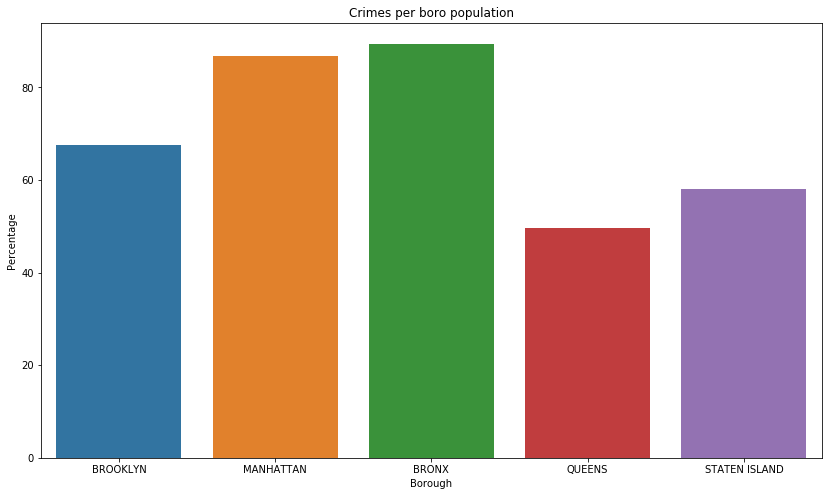

In [34]:
boro_crimes['Crime_per_pop'] =  (boro_crimes['Crimes'] / boro_crimes['Mean Population'])*100

a4_dims = (14, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Borough', y='Crime_per_pop', data=boro_crimes, ax=ax)
plt.ylabel('Percentage')
plt.title('Crimes per boro population')
plt.show()